## Data Science and Business Analysis Internship Task 3

###  by Pushkar Khare

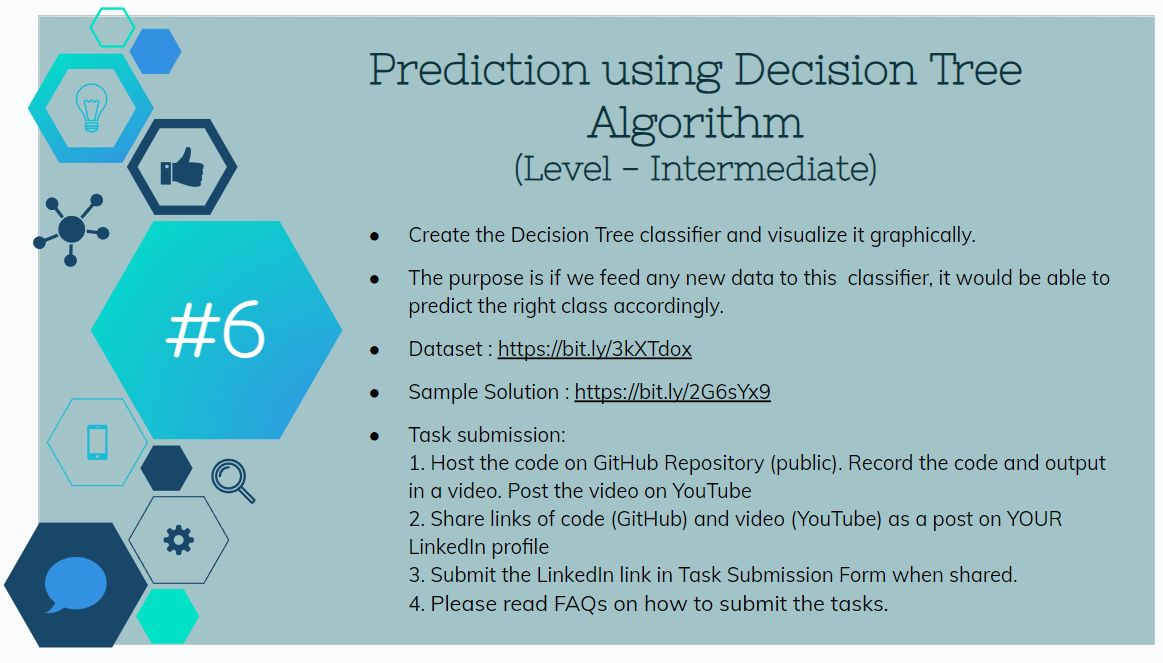

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
import graphviz 

In [103]:
iris = pd.read_csv("iris.csv")

In [104]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
# here no need to change the target variable "Species" to numeric, as decision trees can handle categorical target variables directly

In [106]:
y = iris.Species


In [107]:
X = iris.drop(['Id','Species'], axis = 1)

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [108]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state = 53, test_size = 0.30)

In [109]:
model = DecisionTreeClassifier(criterion = 'gini' , min_samples_split = 2)


In [110]:
model.fit(X_train , y_train)

DecisionTreeClassifier()

In [122]:
#cross validation score
print("accuracy score is :", cross_val_score( model , X_train , y_train , cv = 3 , scoring = 'accuracy').mean())

accuracy score is : 0.980952380952381


In [124]:
#confusion matric
from sklearn.metrics import multilabel_confusion_matrix , accuracy_score

In [134]:
y_pred = model.predict(X_test)

In [135]:
print('accuracy score for validation test data is ', accuracy_score(y_test, y_pred))

multilabel_confusion_matrix(y_test , y_pred)

accuracy score for validation test data is  0.9333333333333333


array([[[34,  0],
        [ 0, 11]],

       [[27,  0],
        [ 3, 15]],

       [[26,  3],
        [ 0, 16]]], dtype=int64)

[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [39, 32, 34]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.625, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 66\nvalue = [0, 32, 34]'),
 Text(0.5, 0.5, 'x[2] <= 4.95\ngini = 0.198\nsamples = 36\nvalue = [0, 32, 4]'),
 Text(0.25, 0.3, 'x[0] <= 4.95\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.75, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

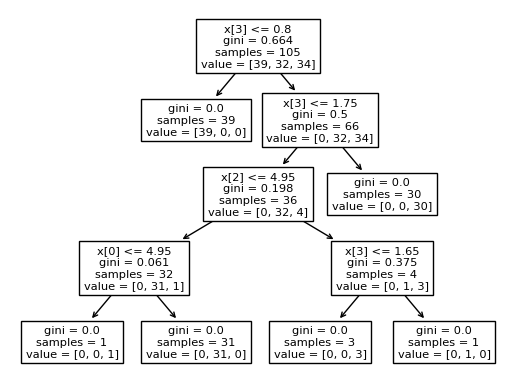

In [115]:
#visualize the tree 

tree.plot_tree(model)